In [1]:
import pandas as pd
df = pd.read_csv('gisette_train.data', header=None)
df.head()

,0
0,550 0 495 0 0 0 0 976 0 0 0 0 983 0 995 0 983 ...
1,0 0 0 0 0 0 0 976 0 0 0 0 0 0 584 0 0 0 0 0 0 ...
2,0 0 0 0 0 0 0 0 0 0 0 0 983 0 995 983 976 0 0 ...
3,0 0 742 0 0 0 0 684 0 956 0 0 983 0 991 816 98...
4,0 0 0 0 0 0 0 608 0 979 0 0 0 0 972 0 0 0 0 0 ...


In [3]:
label_df = pd.read_csv('gisette_train.labels',header=None)

In [4]:
label_df.head()

,0
0,1
1,-1
2,1
3,1
4,1


In [5]:
# The outcome (target) = '1' (Recognised) or '-1' (UnRecognised).
# It is in the column at index 1
label_df.iloc[:,0].unique()

array([ 1, -1], dtype=int64)

In [6]:
feature_df = df.iloc[:,:]
feature_df

,0
0,550 0 495 0 0 0 0 976 0 0 0 0 983 0 995 0 983 ...
1,0 0 0 0 0 0 0 976 0 0 0 0 0 0 584 0 0 0 0 0 0 ...
2,0 0 0 0 0 0 0 0 0 0 0 0 983 0 995 983 976 0 0 ...
3,0 0 742 0 0 0 0 684 0 956 0 0 983 0 991 816 98...
4,0 0 0 0 0 0 0 608 0 979 0 0 0 0 972 0 0 0 0 0 ...
...,...
5995,0 0 0 0 0 0 0 0 0 0 0 0 0 0 956 0 0 0 0 0 0 0 ...
5996,0 0 0 0 0 0 0 0 0 0 0 0 0 0 991 630 0 0 0 719 ...
5997,0 0 0 0 0 758 0 0 0 522 0 0 991 596 0 960 968 ...
5998,0 0 0 0 0 0 0 0 0 0 0 0 0 0 729 501 504 0 0 0 ...


In [9]:
label_column = ['Recognition']
label_df.columns = label_column
label_df

,Recognition
0,1
1,-1
2,1
3,1
4,1
...,...
5995,-1
5996,1
5997,-1
5998,-1


In [11]:
feature_column = ["Pattern"]
feature_df.columns = feature_column
feature_df

,Pattern
0,550 0 495 0 0 0 0 976 0 0 0 0 983 0 995 0 983 ...
1,0 0 0 0 0 0 0 976 0 0 0 0 0 0 584 0 0 0 0 0 0 ...
2,0 0 0 0 0 0 0 0 0 0 0 0 983 0 995 983 976 0 0 ...
3,0 0 742 0 0 0 0 684 0 956 0 0 983 0 991 816 98...
4,0 0 0 0 0 0 0 608 0 979 0 0 0 0 972 0 0 0 0 0 ...
...,...
5995,0 0 0 0 0 0 0 0 0 0 0 0 0 0 956 0 0 0 0 0 0 0 ...
5996,0 0 0 0 0 0 0 0 0 0 0 0 0 0 991 630 0 0 0 719 ...
5997,0 0 0 0 0 758 0 0 0 522 0 0 991 596 0 960 968 ...
5998,0 0 0 0 0 0 0 0 0 0 0 0 0 0 729 501 504 0 0 0 ...


In [13]:
# We may want to change the '-1' and '1' labels to UnRecognised and Recognised so it's easier to read. Or not.
label_df['Recognition'].replace(1, 'Recognised', inplace=True)
label_df['Recognition'].replace(-1, 'UnRecognised', inplace=True)
label_df

,Recognition
0,Recognised
1,UnRecognised
2,Recognised
3,Recognised
4,Recognised
...,...
5995,UnRecognised
5996,Recognised
5997,UnRecognised
5998,UnRecognised


In [17]:
feature_df['Pattern'] = feature_df['Pattern'].map(lambda x: x.strip())

In [18]:
feature_df= feature_df.Pattern.str.split(expand=True)
feature_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,991,0,0,0,0,0,783,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,921,0,886,0
5997,0,0,0,0,0,758,0,0,0,522,...,0,901,0,0,0,0,980,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,690,0,0,0,0,0


In [19]:
# Use sklearn to standardise (specifically: normalise) the data so that 
# the data has a normal distribution -- mean = 0; stdev = 1
from sklearn.preprocessing import StandardScaler
import numpy as np

x = feature_df.values
x = StandardScaler().fit_transform(x)
# ... and check if it worked
np.mean(x),np.std(x)

(-2.17544500931884e-19, 0.9954898291795854)

In [20]:
# x is now a numpy array. Convert it back to a df
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()
normalised_breast

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature4990,feature4991,feature4992,feature4993,feature4994,feature4995,feature4996,feature4997,feature4998,feature4999
0,1.541220,-0.123041,0.941497,-0.036904,-0.138874,-0.257925,-0.142175,1.560614,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,1.598069,3.553351,-0.241703,-0.667996,-0.137595,-0.416091,2.539524
1,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,1.560614,-0.055548,-0.460474,...,-0.530165,1.314338,-0.048717,1.598069,-0.316455,-0.241703,1.841290,-0.137595,-0.416091,-0.470436
2,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,-0.772203,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,-0.470436
3,-0.389794,-0.123041,1.664288,-0.036904,-0.138874,-0.257925,-0.142175,0.862681,-0.055548,2.547359,...,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,1.038622,-0.137595,-0.416091,2.095532
4,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,0.681027,-0.055548,2.619723,...,2.161801,-0.402723,-0.048717,1.210707,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,-0.470436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,-0.772203,-0.055548,-0.460474,...,2.161801,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,1.314618,-0.137595,-0.416091,-0.470436
5996,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,-0.772203,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,1.664045,-0.137595,2.595231,-0.470436
5997,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,3.635916,-0.142175,-0.772203,-0.055548,1.181878,...,-0.530165,2.854271,-0.048717,-0.756994,-0.316455,-0.241703,1.813437,-0.137595,-0.416091,-0.470436
5998,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,-0.772203,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,-0.756994,2.377961,-0.241703,-0.667996,-0.137595,-0.416091,-0.470436


In [27]:
# Choose the first 2 principal components
from sklearn.decomposition import PCA

pca_gisette = PCA(n_components=2)
principalComponents_gisette = pca_gisette.fit_transform(x)

principal_gisette_df = pd.DataFrame(data = principalComponents_gisette
             , columns = ['principal component 1', 'principal component 2'])
principal_gisette_df

,principal component 1,principal component 2
0,27.930792,6.381840
1,18.516411,-9.880824
2,10.245840,-13.196420
3,11.003065,-3.281922
4,-13.678306,-3.768817
...,...,...
5995,-5.267393,7.005546
5996,-10.807243,1.528889
5997,4.001788,-12.656336
5998,-4.213572,-13.101354


In [28]:
# One thing that's often useful is "how much of the variance is explained"
# in any principal component.
print('Explained variation per principal component: {}'.format(pca_gisette.explained_variance_ratio_))

Explained variation per principal component: [0.02883488 0.02258951]


<Figure size 432x288 with 0 Axes>

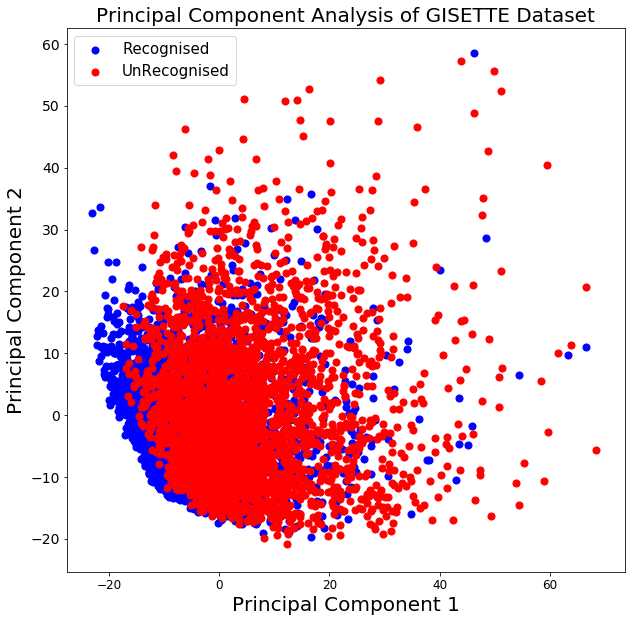

In [42]:
# Let's plot it!
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of GISETTE Dataset",fontsize=20)
targets = ['Recognised', 'UnRecognised']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = label_df == target
    plt.scatter(principal_gisette_df.loc[indicesToKeep['Recognition'], 'principal component 1'],
                principal_gisette_df.loc[indicesToKeep['Recognition'], 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [46]:
# How many principal components do we need to explain the variance in data?
pca = PCA().fit(x)

evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr)))

 0: 0.0288
 1: 0.0226
 2: 0.0166
 3: 0.0162
 4: 0.0124
 5: 0.0114
 6: 0.0102
 7: 0.0088
 8: 0.0072
 9: 0.0069
10: 0.0065
11: 0.0056
12: 0.0052
13: 0.0049
14: 0.0047
15: 0.0044
16: 0.0040
17: 0.0039
18: 0.0037
19: 0.0036
20: 0.0035
21: 0.0033
22: 0.0033
23: 0.0032
24: 0.0029
25: 0.0029
26: 0.0028
27: 0.0027
28: 0.0027
29: 0.0026
30: 0.0025
31: 0.0024
32: 0.0024
33: 0.0023
34: 0.0022
35: 0.0022
36: 0.0021
37: 0.0021
38: 0.0021
39: 0.0020
40: 0.0020
41: 0.0019
42: 0.0019
43: 0.0019
44: 0.0019
45: 0.0018
46: 0.0018
47: 0.0017
48: 0.0017
49: 0.0017
50: 0.0016
51: 0.0016
52: 0.0016
53: 0.0016
54: 0.0016
55: 0.0015
56: 0.0015
57: 0.0015
58: 0.0014
59: 0.0014
60: 0.0014
61: 0.0014
62: 0.0014
63: 0.0014
64: 0.0013
65: 0.0013
66: 0.0013
67: 0.0013
68: 0.0013
69: 0.0013
70: 0.0013
71: 0.0013
72: 0.0012
73: 0.0012
74: 0.0012
75: 0.0012
76: 0.0012
77: 0.0012
78: 0.0011
79: 0.0011
80: 0.0011
81: 0.0011
82: 0.0011
83: 0.0011
84: 0.0011
85: 0.0011
86: 0.0011
87: 0.0010
88: 0.0010
89: 0.0010
90: 0.0010

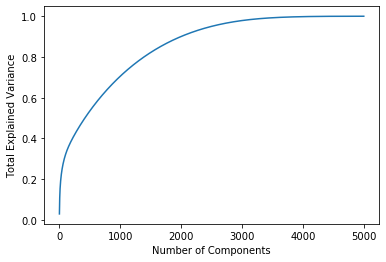

In [47]:
# Graph it...
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');